In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import random
import cv2

In [13]:
HORSE_TRAIN_PATH = 'data/horse2zebra/trainA/'
ZEBRA_TRAIN_PATH = 'data/horse2zebra/trainB/'


horse_images = sorted(glob.glob(HORSE_TRAIN_PATH + '*.jpg'))
zebra_images = sorted(glob.glob(ZEBRA_TRAIN_PATH + '*.jpg'))
print('Total number of horse train images: {}'.format(len(horse_images)))
print('Total number of zebra train images: {}'.format(len(zebra_images)))

Total number of horse train images: 1067
Total number of zebra train images: 1334


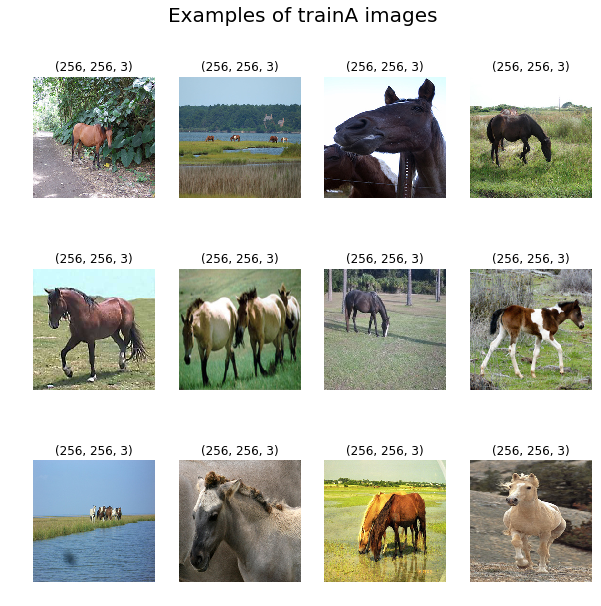

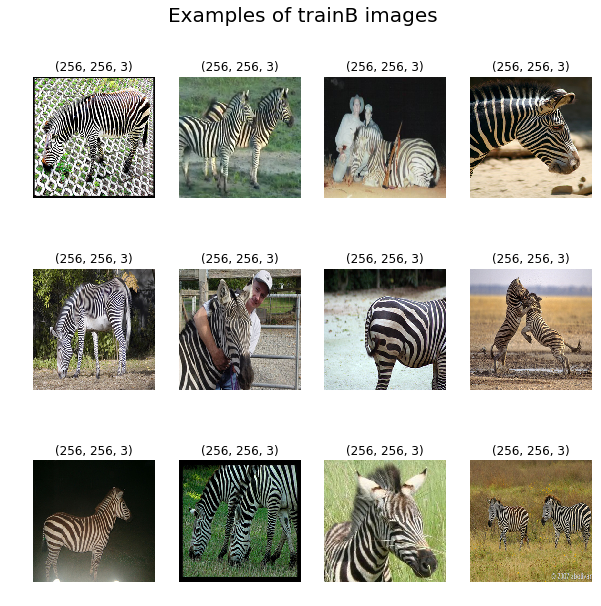

In [15]:
def plot_examples(images):
    """Plots random examples of train images."""
    plt.figure(figsize=(10, 10))
    random_images = random.sample(images, 12)
    for i in range(12):
        plt.subplot(3, 4, i+1)
        img = plt.imread(random_images[i])
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis('off')
        plt.suptitle('Examples of {} images\n'.format(images[1].split('/')[2]), y=0.95, fontsize=20)

        
plot_examples(horse_images)
plot_examples(zebra_images)

In [ ]:
def create_df(folders, path):
    """ Read basic properties of images. 
    Returns a dataframe with statistics."""
    data = []
    for i in range(len(folders)):
        ids = sorted(glob.glob(path + folders[i] + '*.png'))
        for img_id in ids:
            image = cv2.imread(img_id)
            img_shape = image.shape
            min_px = image.min()
            max_px = image.max()
            data.append([img_id, img_shape[0], img_shape[1], img_shape[2], min_px, max_px])
            df = pd.DataFrame(data, columns=['img_id', 'img_height', 'img_width', 'n_channels',
                                         'min_px', 'max_px'])
    return df

ir_df = create_df(ir_folders, IR_DATA_PATH)
rgb_df = create_df(rgb_folders, RGB_DATA_PATH)